In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def func(a0, a1, x):
    return a0 + a1*x

In [4]:
N = np.array([
    [6, 15, 55],
    [15, 55, 225],
    [55, 225, 979]
])
r = np.array([152.6, 585.6, 2488.8])
np.linalg.solve(N, r)

N_inv = np.linalg.inv(N)
x = np.dot(N_inv, r)
x

array([2.47857143, 2.35928571, 1.86071429])

s y: 508.2598990673964
s y/x: 189.78854670479316
r^2: 0.8804852467812262


i,xi,yi,ao + a1*xi,(y-y_bar)^2,(yi-a0-a1*xi)
1,10,25,-39.583333,380534.765625,4171.006944
2,20,70,155.119048,327041.015625,7245.252268
3,30,380,349.821429,68578.515625,910.746173
4,40,550,544.523810,8441.015625,29.988662
5,50,610,739.226190,1016.015625,16699.408305
6,60,1220,933.928571,334228.515625,81836.862245
7,70,830,1128.630952,35391.015625,89180.445720
8,80,1450,1323.333333,653066.015625,16044.444444


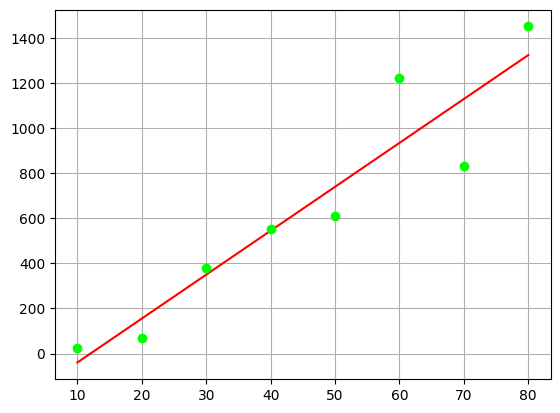

In [5]:
x = np.arange(10,80+1,10)
y = np.array([25, 70, 380, 550, 610, 1220, 830, 1450])
n = len(x)

a1 = (n*(x*y).sum() - x.sum()*y.sum()) / (n*(x**2).sum()-x.sum()**2)
a0 = np.average(y) - a1 * np.average(x)
f = lambda x: func(a0, a1, x)
yf = f(x)

df = pd.DataFrame(
    {
        'i': np.arange(1, n+1),
        'xi': x,
        'yi': y,
        'ao + a1*xi': a0+a1*x,
        '(y-y_bar)^2': (y-np.average(y))**2,
        '(yi-a0-a1*xi)': (y-a0-a1*x)**2
    }
)
sy = np.sqrt(df["(y-y_bar)^2"].sum()/(8-1))
syx = np.sqrt(df['(yi-a0-a1*xi)'].sum()/(8-2))
r2 = (df["(y-y_bar)^2"].sum() - df['(yi-a0-a1*xi)'].sum()) / df["(y-y_bar)^2"].sum()

print("s y:", sy)
print("s y/x:", syx)
print("r^2:", r2)
display(df.style.hide(axis='index'))

plt.plot(x, yf, color="#FF0000")
plt.plot(x, y, 'o', color="#00FF00")
plt.grid(True)
plt.show()